In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

from __future__ import division
from __future__ import print_function
from __future__ import absolute_import
from __future__ import unicode_literals  

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
from scipy.stats import pearsonr

import IPython

sns.set(color_codes=True)

# Fight between 1 point from each class and repeats of another point

In [2]:
def plot_influence_against_repeats(influence_file_prefix, points):
    pos_plots = []
    neg_plots = []
    for point in points:
        influence_file = "{}-{}.npz".format(influence_file_prefix, point)
        f = np.load(influence_file)

        actual_loss_diffs = f['actual_loss_diffs']
        repeats = f['repeats']
        
        # diff = retrained_with_repeats - trained_with_no_repeats
        # influence = remove_some_number - remove_none
        # may not be a good comparison because the base dataset is changing
        influence = -actual_loss_diffs
        
        if np.mean(influence) > 0:
            pos_plots.append((repeats, influence, point))
        else:
            neg_plots.append((repeats, influence, point))
    
    sns.set_style('white')
    fig, axs = plt.subplots(1, 2, sharex=True, sharey=False, figsize=(16, 8))
    for ax in axs:
        ax.set_xlabel('Repeats')
        ax.set_ylabel('Actual loss diff')
        
    axs[0].set_title("Positive influence")
    axs[1].set_title("Negative influence")
    
    for X, Y, label in pos_plots:
        axs[0].plot(X, Y, label=label)
    for X, Y, label in neg_plots:
        axs[1].plot(X, Y, label=label)

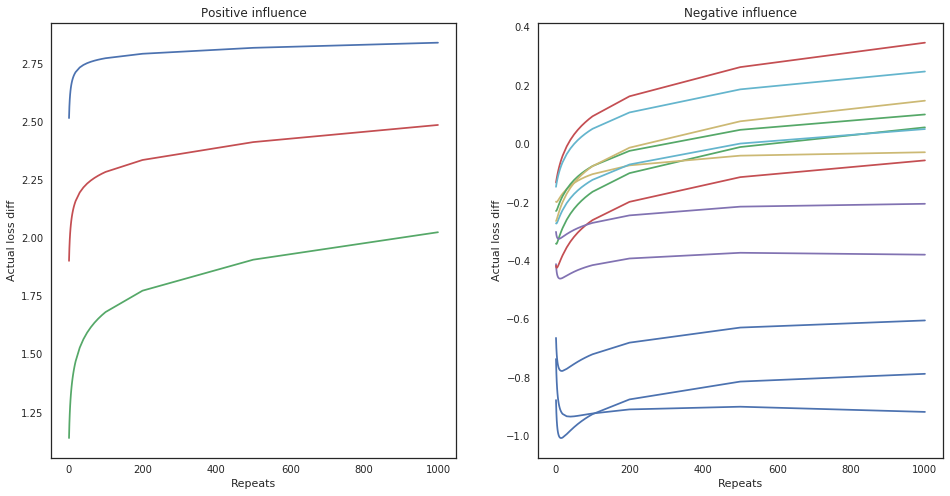

In [3]:
fought_points = [40, 50, 60, 70, 80, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100]
plot_influence_against_repeats('../output/mnist_logreg_lbfgs_repeated_point-fight', fought_points)

# Repeat same point in MNIST

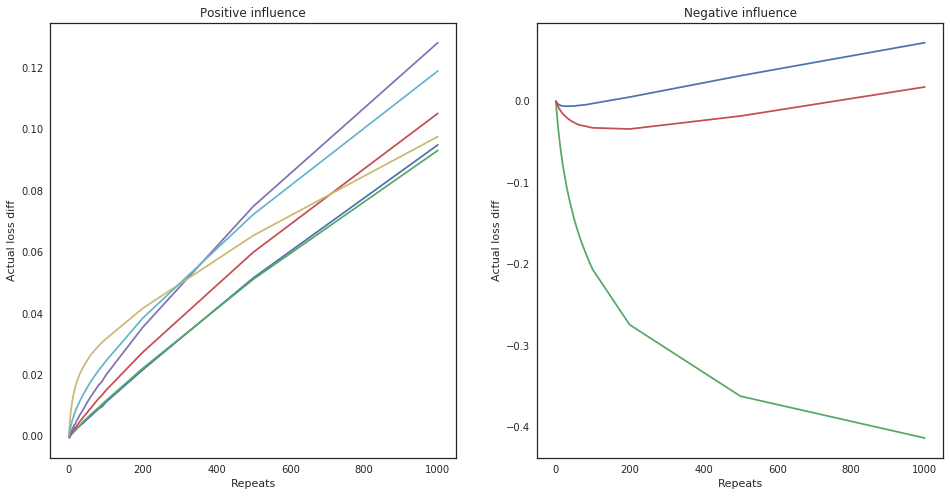

In [4]:
points = [6, 7, 8, 9, 10, 20, 30, 40, 50]
plot_influence_against_repeats('../output/mnist_logreg_lbfgs_repeated_point', points)